In [123]:
import pandas as pd
import numpy as np

# data visualization
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import plot
import missingno as msno
from wordcloud import WordCloud
from PIL import Image

# request
import requests

# tensorflow, for NN
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, GlobalMaxPooling1D, Dropout

# NLTK, for NLP
import nltk
from nltk.util import ngrams
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('omw-1.4')

# sklearn, for preprocessing & scoring
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/anitateladevalapalli/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [125]:
df = pd.read_csv('/Users/anitateladevalapalli/Documents/NN/code_data/Womens Clothing E-Commerce Reviews.csv')
print('Shape of DataFrame(before preprocess): ',df.shape,'\n')
df.head(2)


Shape of DataFrame(before preprocess):  (23486, 11) 



Unnamed: 0  Clothing ID  Age Title  \
0           0          767   33   NaN   
1           1         1080   34   NaN   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's sooo pretty.  i happene...       5                1   

   Positive Feedback Count Division Name Department Name Class Name  
0                        0     Initmates        Intimate  Intimates  
1                        4       General         Dresses    Dresses

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_83837/3165459677.py:6: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_83837/3165459677.py:9: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]),
 [Text(0.5, 0, 'Unnamed: 0'),
  Text(1.5, 0, 'Clothing ID'),
  Text(2.5, 0, 'Age'),
  Text(3.5, 0, 'Rating'),
  Text(4.5, 0, 'Recommended IND'),
  Text(5.5, 0, 'Positive Feedback Count')])

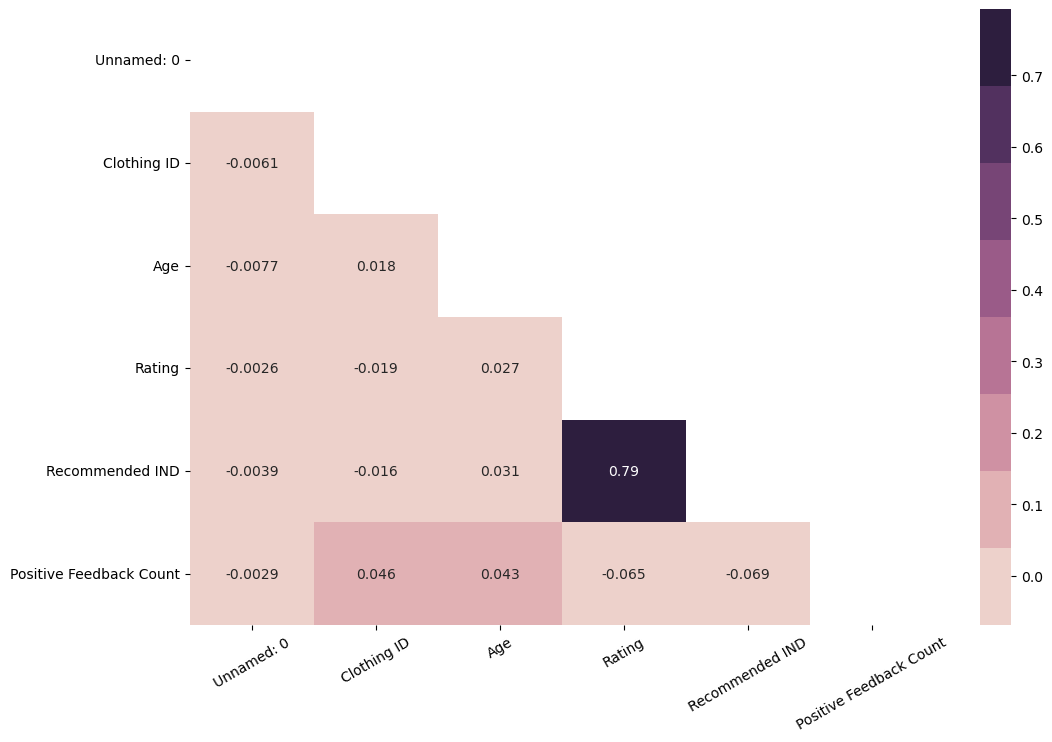

In [126]:
plt.figure(figsize=(12, 8))

# Getting the Upper Triangle of the co-relation matrix
import numpy as np

matrix = np.triu(df.corr())

# using the upper triangle matrix as mask 
sns.heatmap(df.corr(), annot=True, cmap = sns.cubehelix_palette(8), mask=matrix)

plt.xticks(rotation=30)

In [127]:
df.info()
#sns.barplot(data=df, x='Age', y='Class Name')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


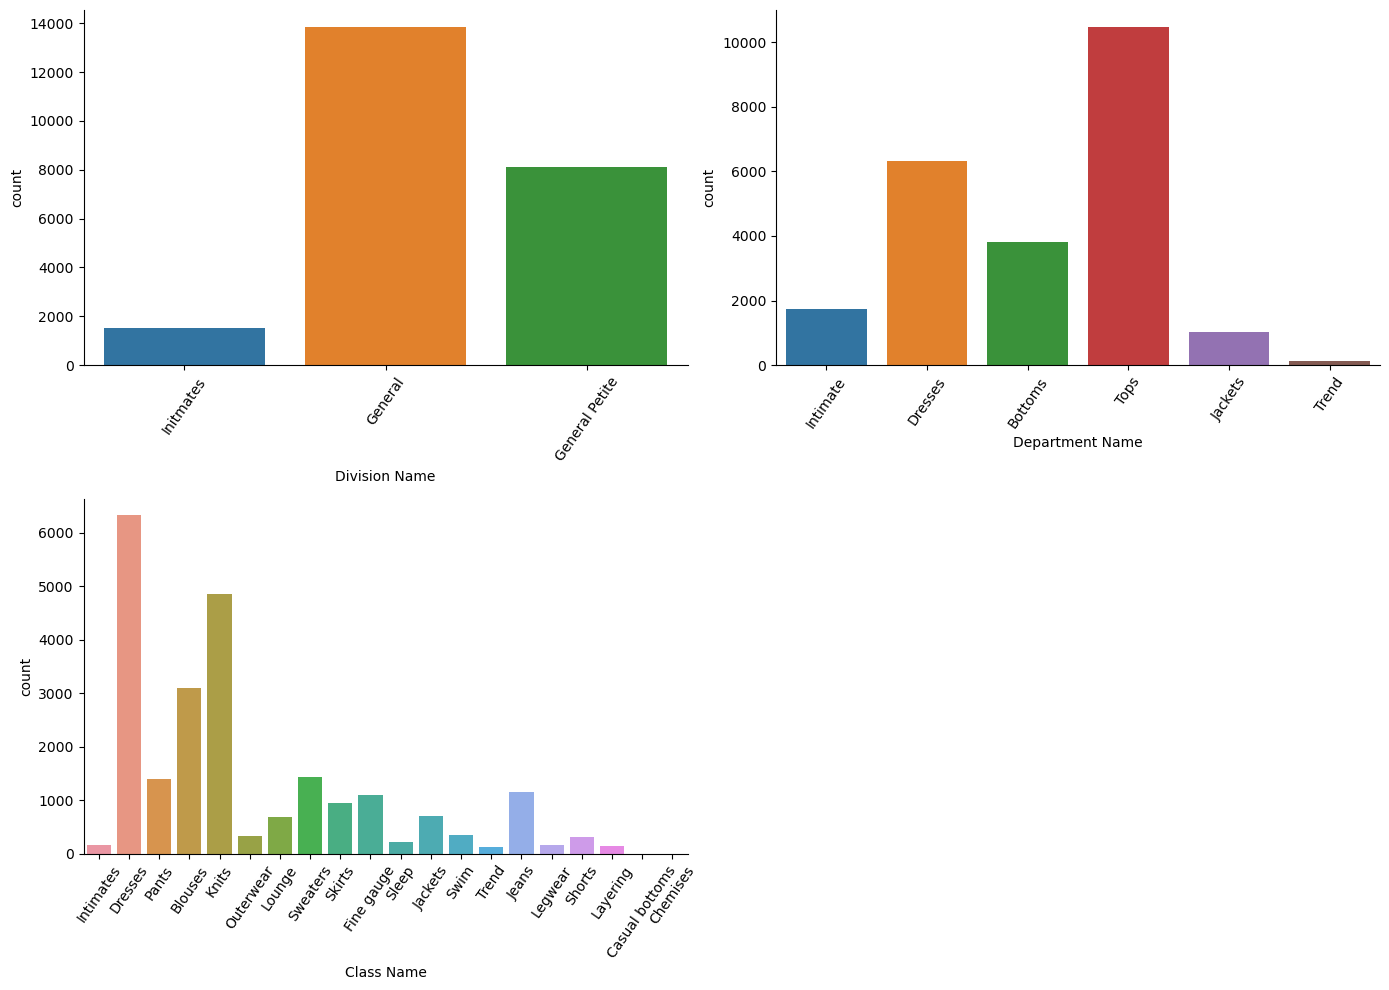

In [128]:
df_numerical = df.select_dtypes(include=['int64'])
df_categorical = df.select_dtypes(include=['object'])
df_cat = df[['Division Name', 'Department Name','Class Name']]
#print(df_cat)
#print("Numerical col: ", df_numerical.columns)
#print()
#print("Object col: ", list(df_cat.columns))

plt.figure(figsize=[14,10])
n=1
for column in list(df_cat.columns):
    plt.subplot(2,2,n)
    sns.countplot(x=column,data=df)
    sns.despine()
    #plt.title(f"Distribution of {column}", fontsize=16, fontweight='bold')
    plt.xticks(rotation=55)
    n=n+1
plt.tight_layout()
plt.show()

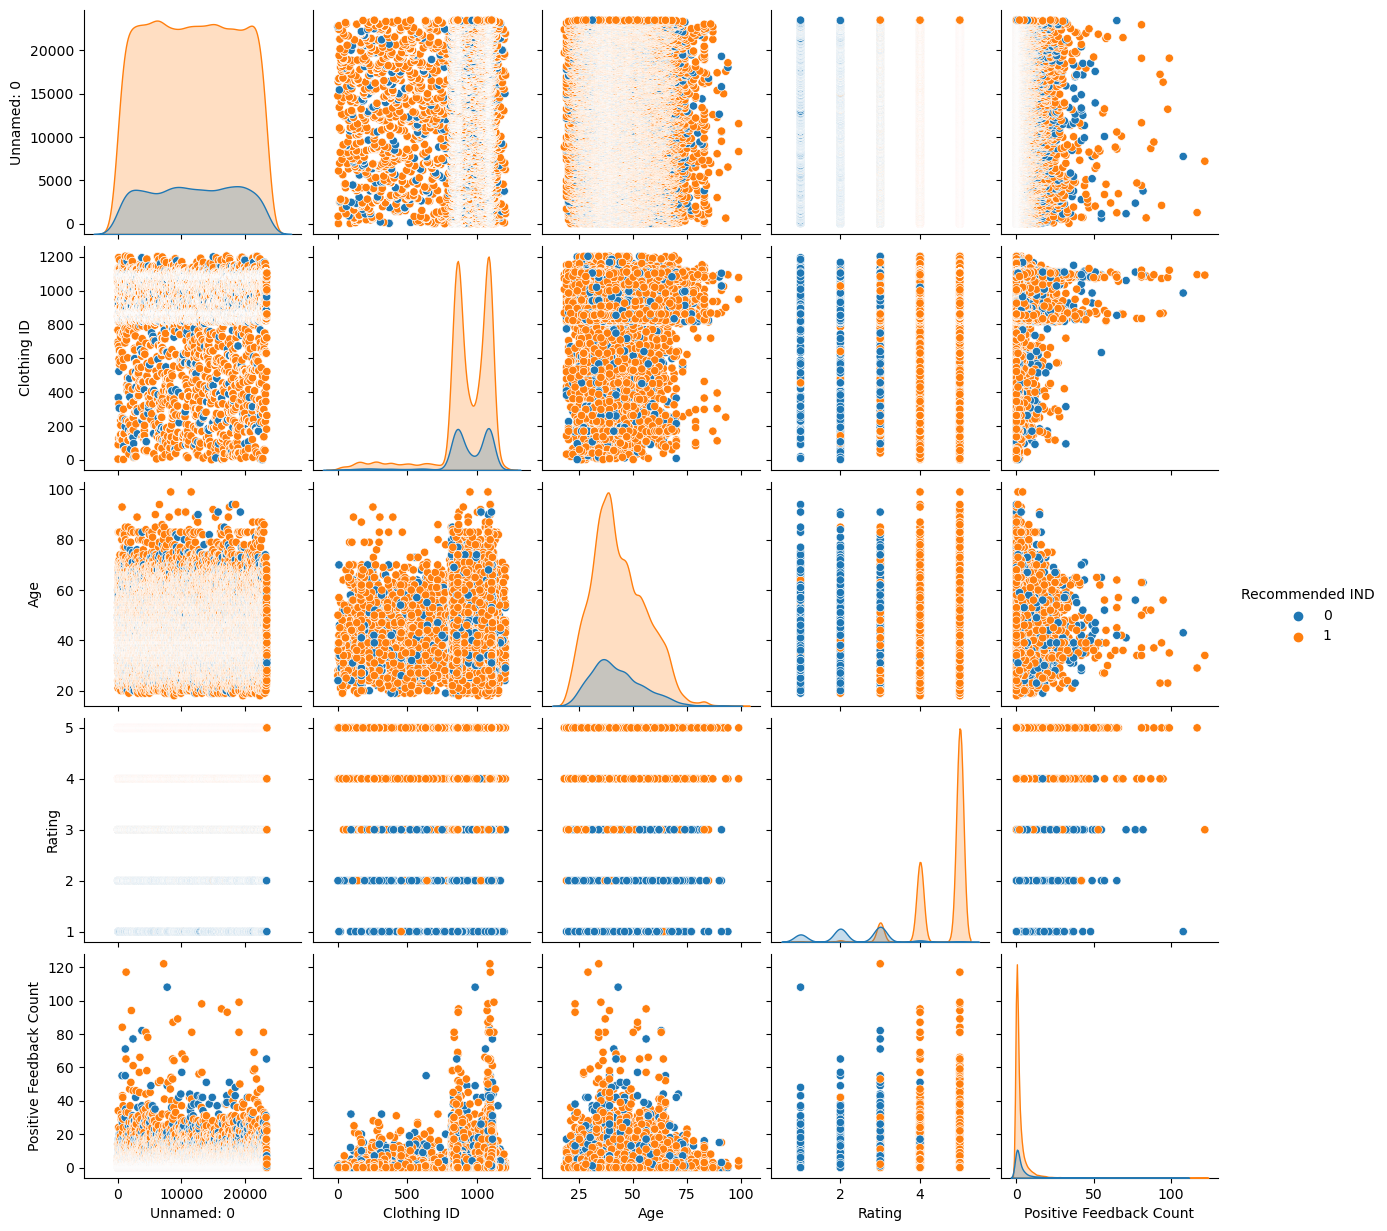

In [129]:
sns.pairplot(df, hue='Recommended IND')

<AxesSubplot:xlabel='Age', ylabel='Count'>

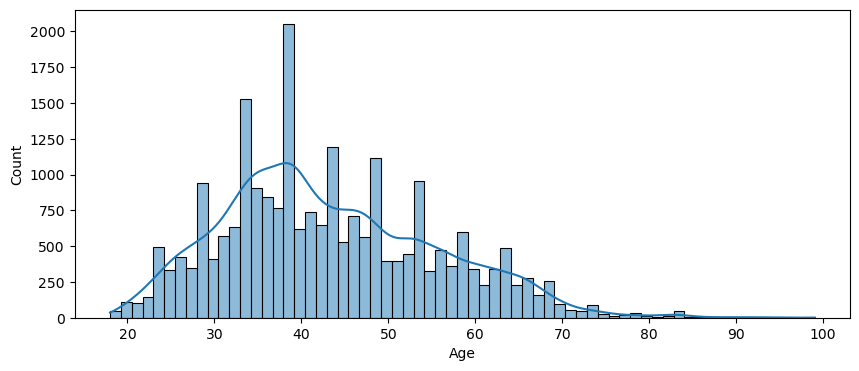

In [130]:
# Import library for Data Visualization
plt.figure(figsize = (10, 4))
sns.histplot(data=df, x='Age', kde=True)

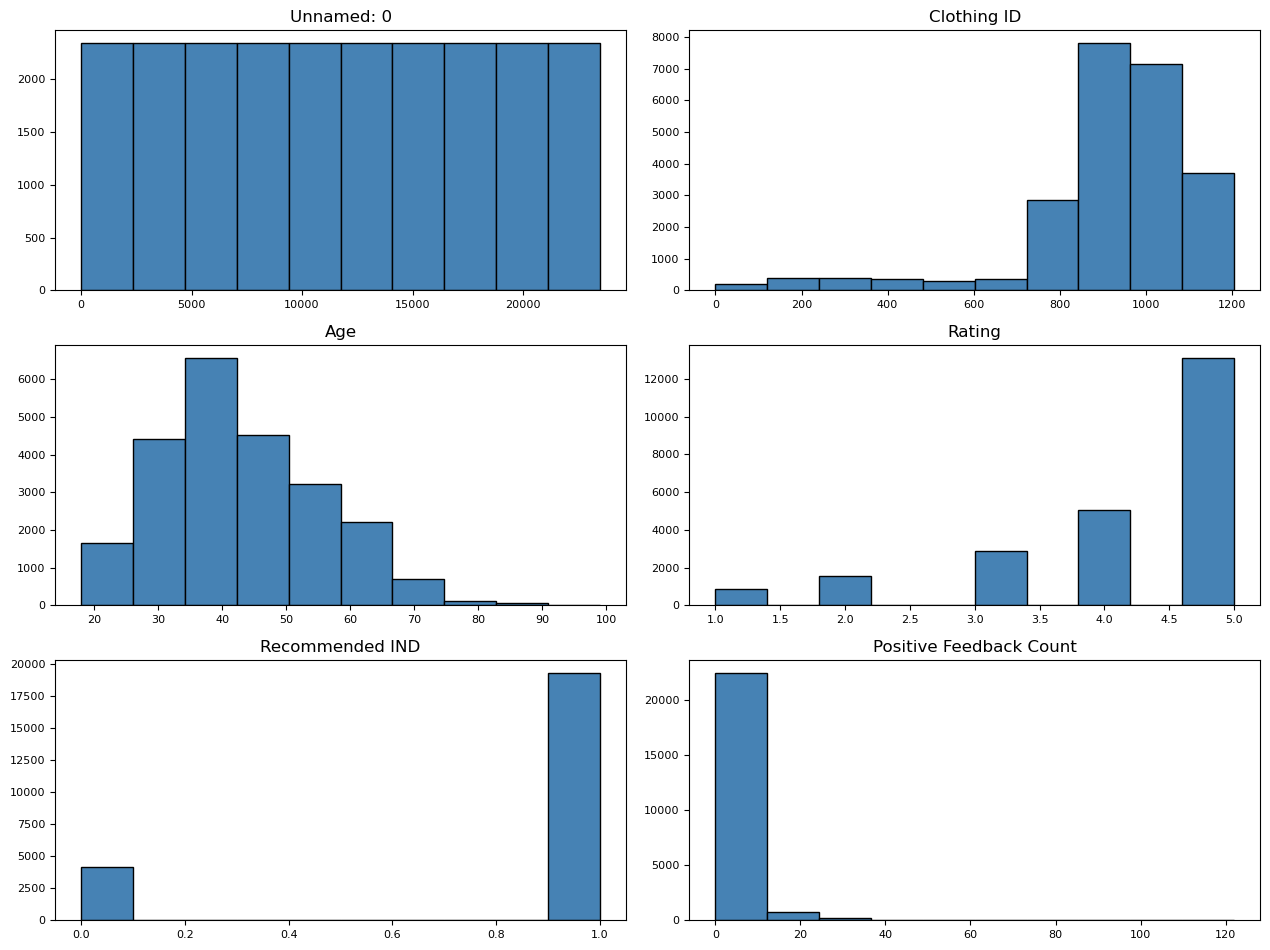

In [131]:
df.hist(bins=10, color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 2, 2))

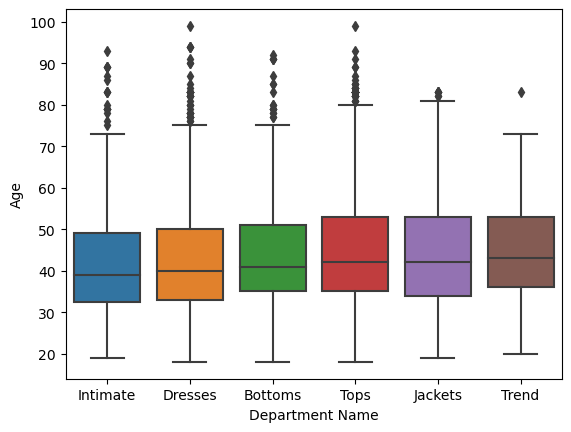

In [132]:
sns.boxplot(x=df['Department Name'], y=df['Age'])
plt.show()

<AxesSubplot:xlabel='Rating', ylabel='Count'>

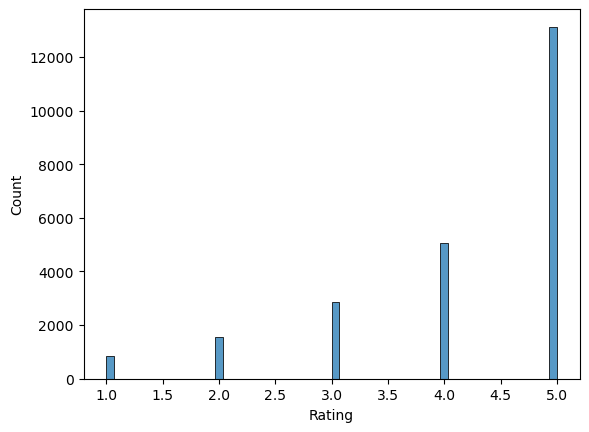

In [133]:
sns.histplot(data=df, x='Rating', kde=False)

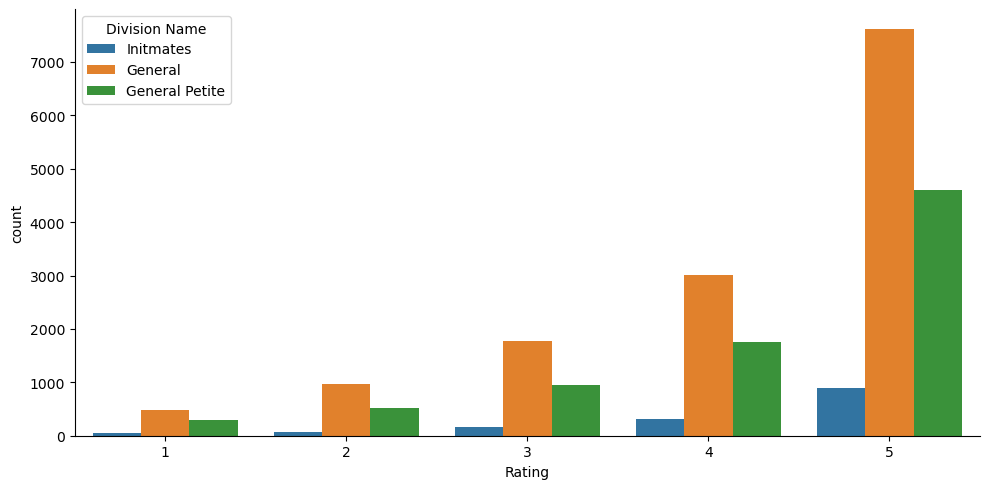

In [134]:
sns.catplot(data = df, x ="Rating", hue = "Division Name", kind='count', height=5, aspect=2, legend_out=False)

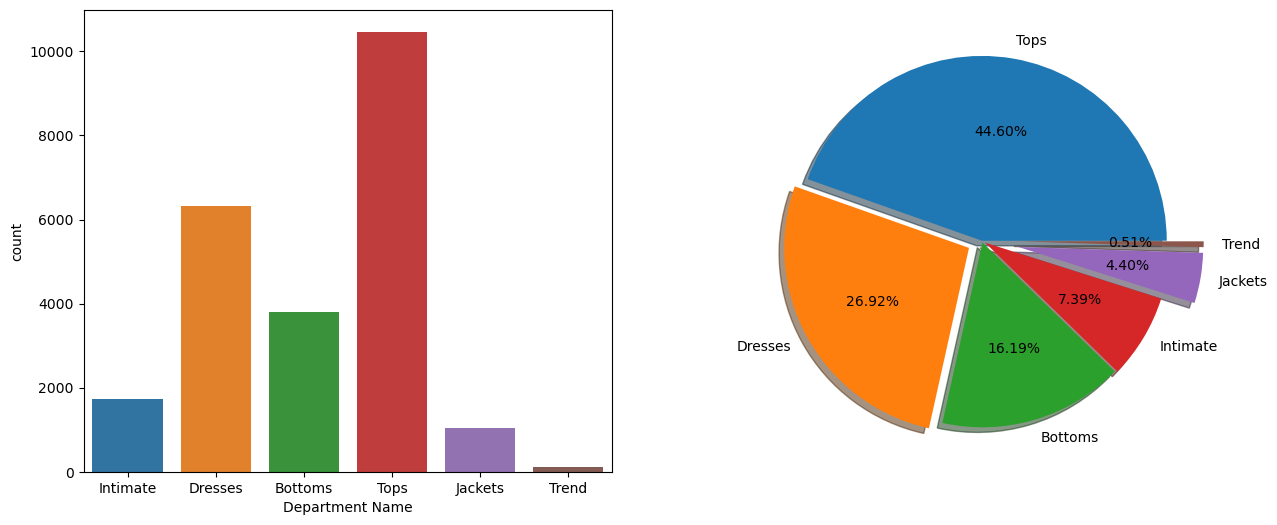

In [135]:
plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
sns.countplot(x = df['Department Name'], data = df)

plt.subplot(1, 2, 2)
plt.pie(x= df['Department Name'].value_counts(),labels=('Tops','Dresses',"Bottoms","Intimate","Jackets","Trend") ,explode = (0, 0.08, 0.01,0.02,0.2,0.2), shadow = True, autopct = '%1.2f%%')

plt.show()

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_83837/2229178125.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




Text(0.5, 1.0, 'Positive Feedback Count dist')

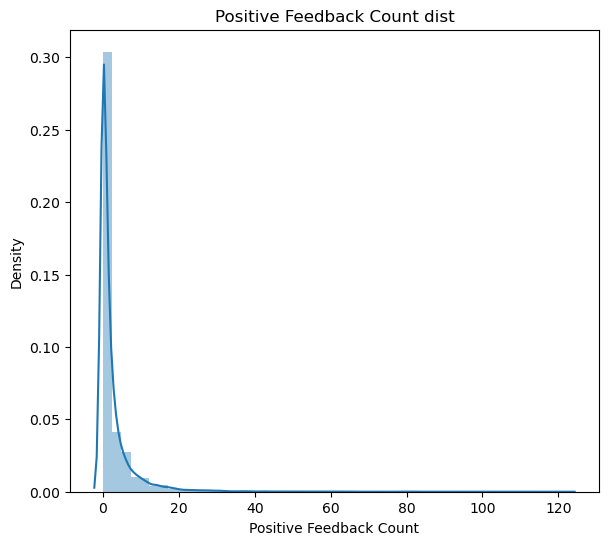

In [136]:
plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
plt.title = ('Positive Feedback Count')
sns.distplot(df['Positive Feedback Count']).set_title("Positive Feedback Count dist")

/var/folders/6f/c2b7vdpx247cstzj573kd1k40000gn/T/ipykernel_83837/3997324963.py:1: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



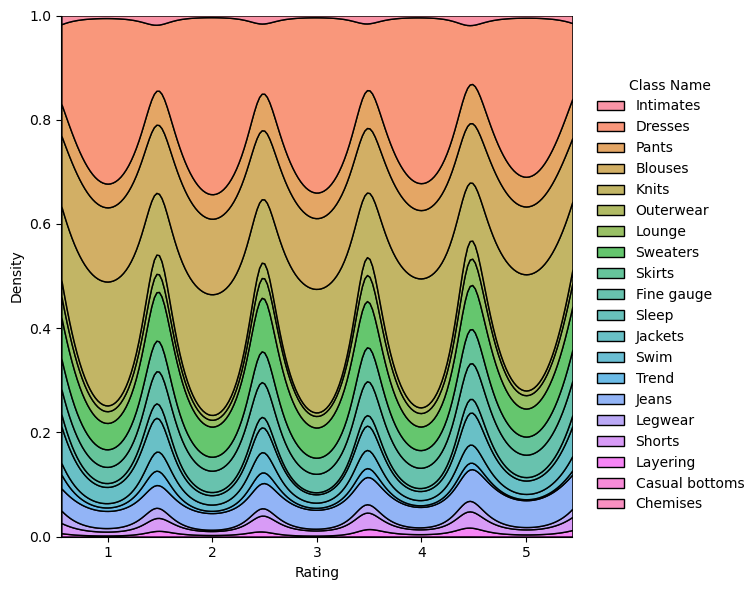

In [137]:
sns.displot(data=df,
           x='Rating', hue="Class Name",
    kind="kde", height=6,
    multiple="fill", clip=(0, None)
)

<AxesSubplot:xlabel='count', ylabel='Class Name'>

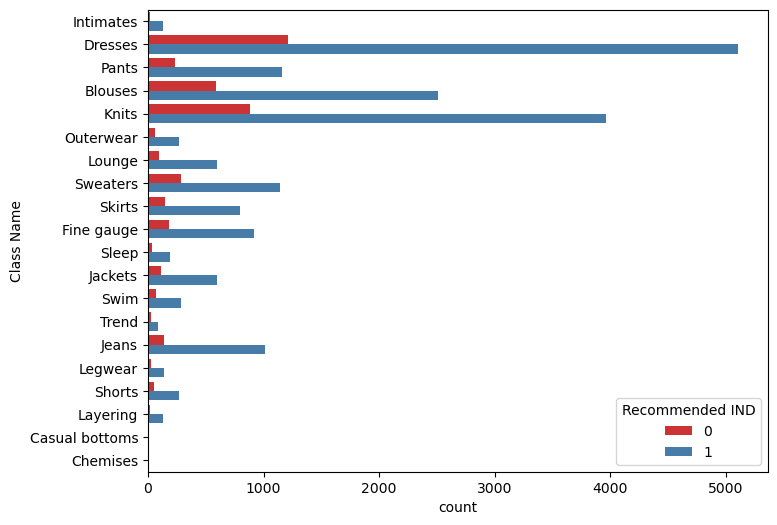

In [138]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, y='Class Name', hue='Recommended IND', palette = "Set1")

In [139]:
# Converting 0 & 1 in Not Recommended & Recommended
'''df.loc[df['Recommended IND'] == 0, 'Recommended IND'] = "Not Recommended" 
df.loc[df['Recommended IND'] == 1, 'Recommended IND'] = "Recommended"
plt.figure(figsize = (6,4))
x = df['Recommended IND'].value_counts()
labels = 'Recommended','Not Recommended'
plt.pie(x = x,  labels = labels,
        autopct = '%.2f%%', 
        textprops = {'size' : 'x-large',
                   'fontweight' : 'bold'})
#plt.title('Distribution of Recomended ID', fontsize = 14, fontweight = 'bold')
plt.legend(labels, loc="upper left", bbox_to_anchor = (1,1))
plt.tight_layout()
plt.show()'''

'df.loc[df[\'Recommended IND\'] == 0, \'Recommended IND\'] = "Not Recommended" \ndf.loc[df[\'Recommended IND\'] == 1, \'Recommended IND\'] = "Recommended"\nplt.figure(figsize = (6,4))\nx = df[\'Recommended IND\'].value_counts()\nlabels = \'Recommended\',\'Not Recommended\'\nplt.pie(x = x,  labels = labels,\n        autopct = \'%.2f%%\', \n        textprops = {\'size\' : \'x-large\',\n                   \'fontweight\' : \'bold\'})\n#plt.title(\'Distribution of Recomended ID\', fontsize = 14, fontweight = \'bold\')\nplt.legend(labels, loc="upper left", bbox_to_anchor = (1,1))\nplt.tight_layout()\nplt.show()'

Text(0.5, 1.0, 'Distribution of Missing Value (Before)')

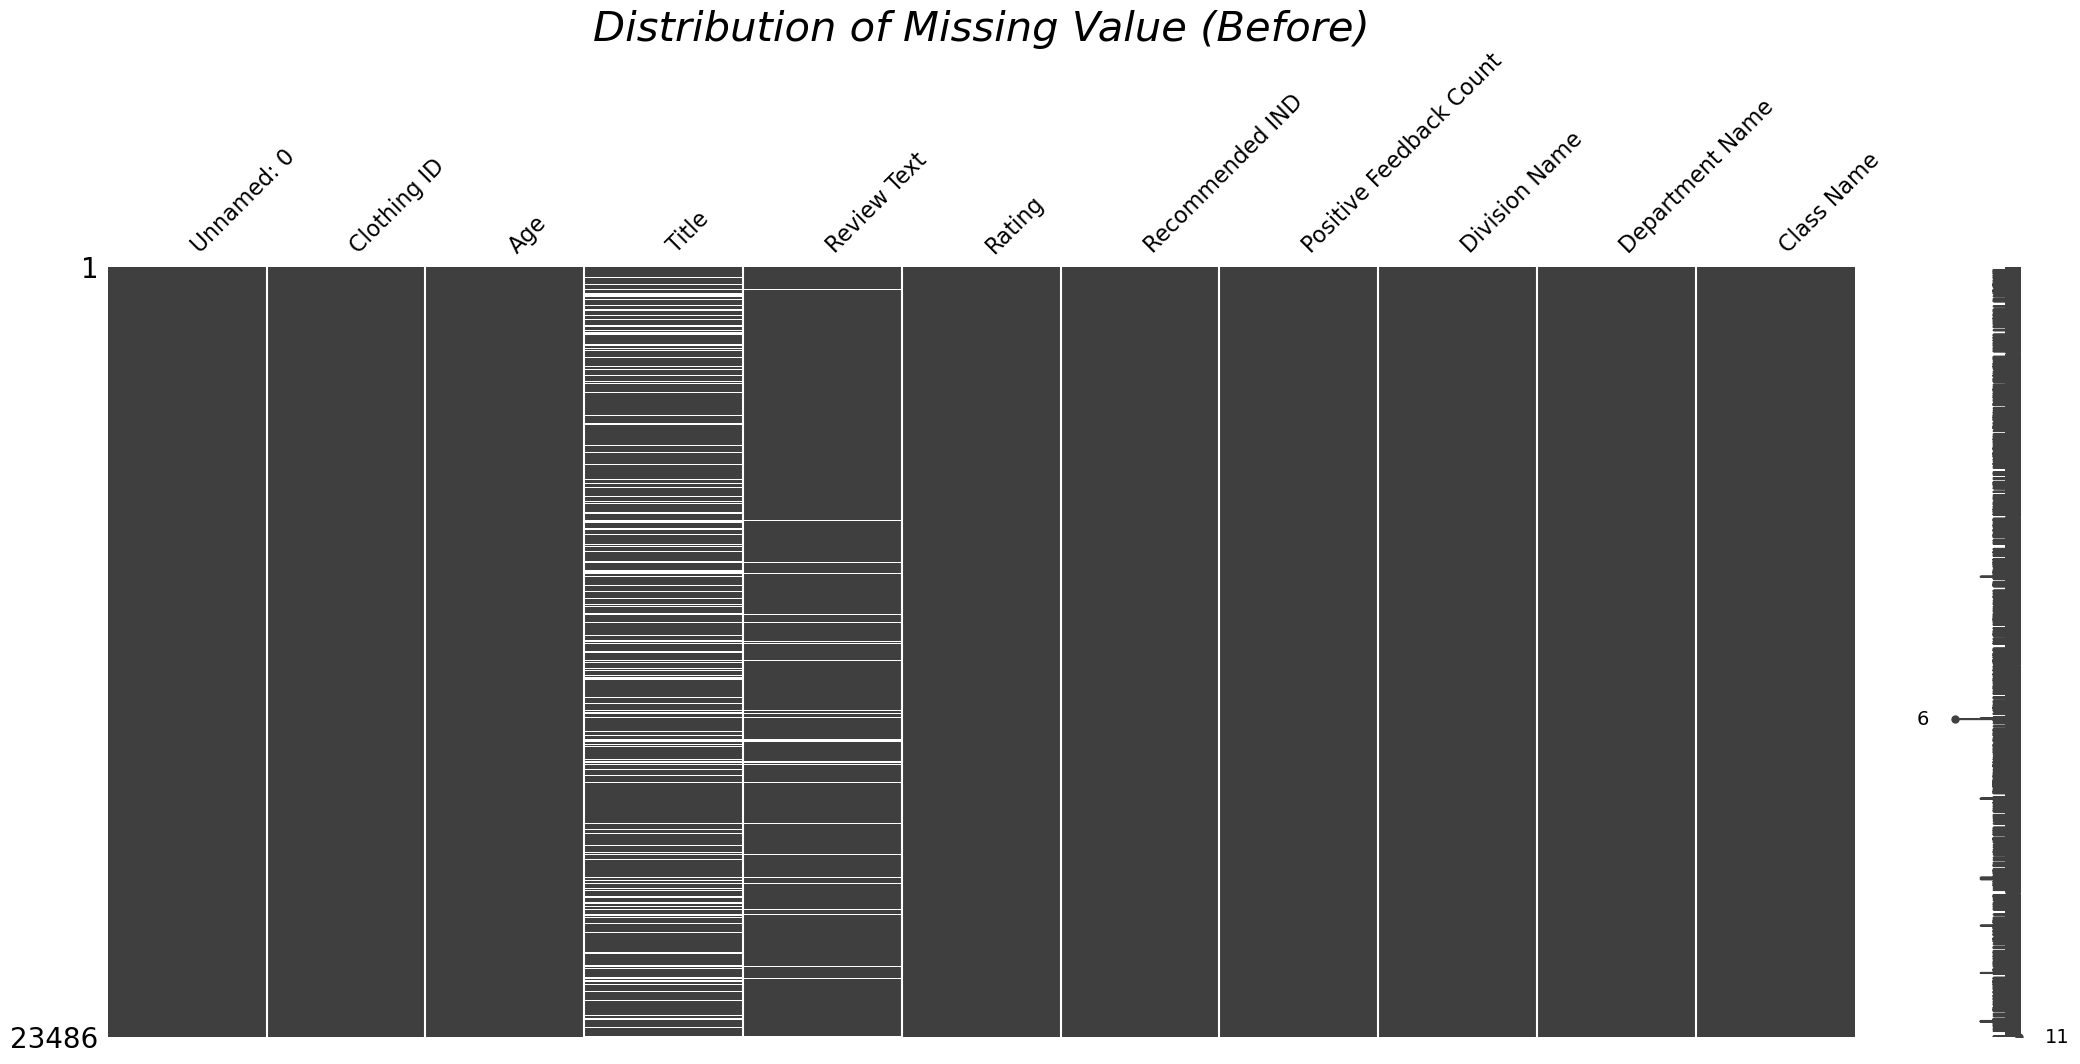

In [140]:
msno.matrix(df).set_title('Distribution of Missing Value (Before)',fontsize=30, fontstyle= 'oblique')

Shape of DataFrame:  (19662, 8)


Text(0.5, 1.0, 'Distribution of Missing Value (After)')

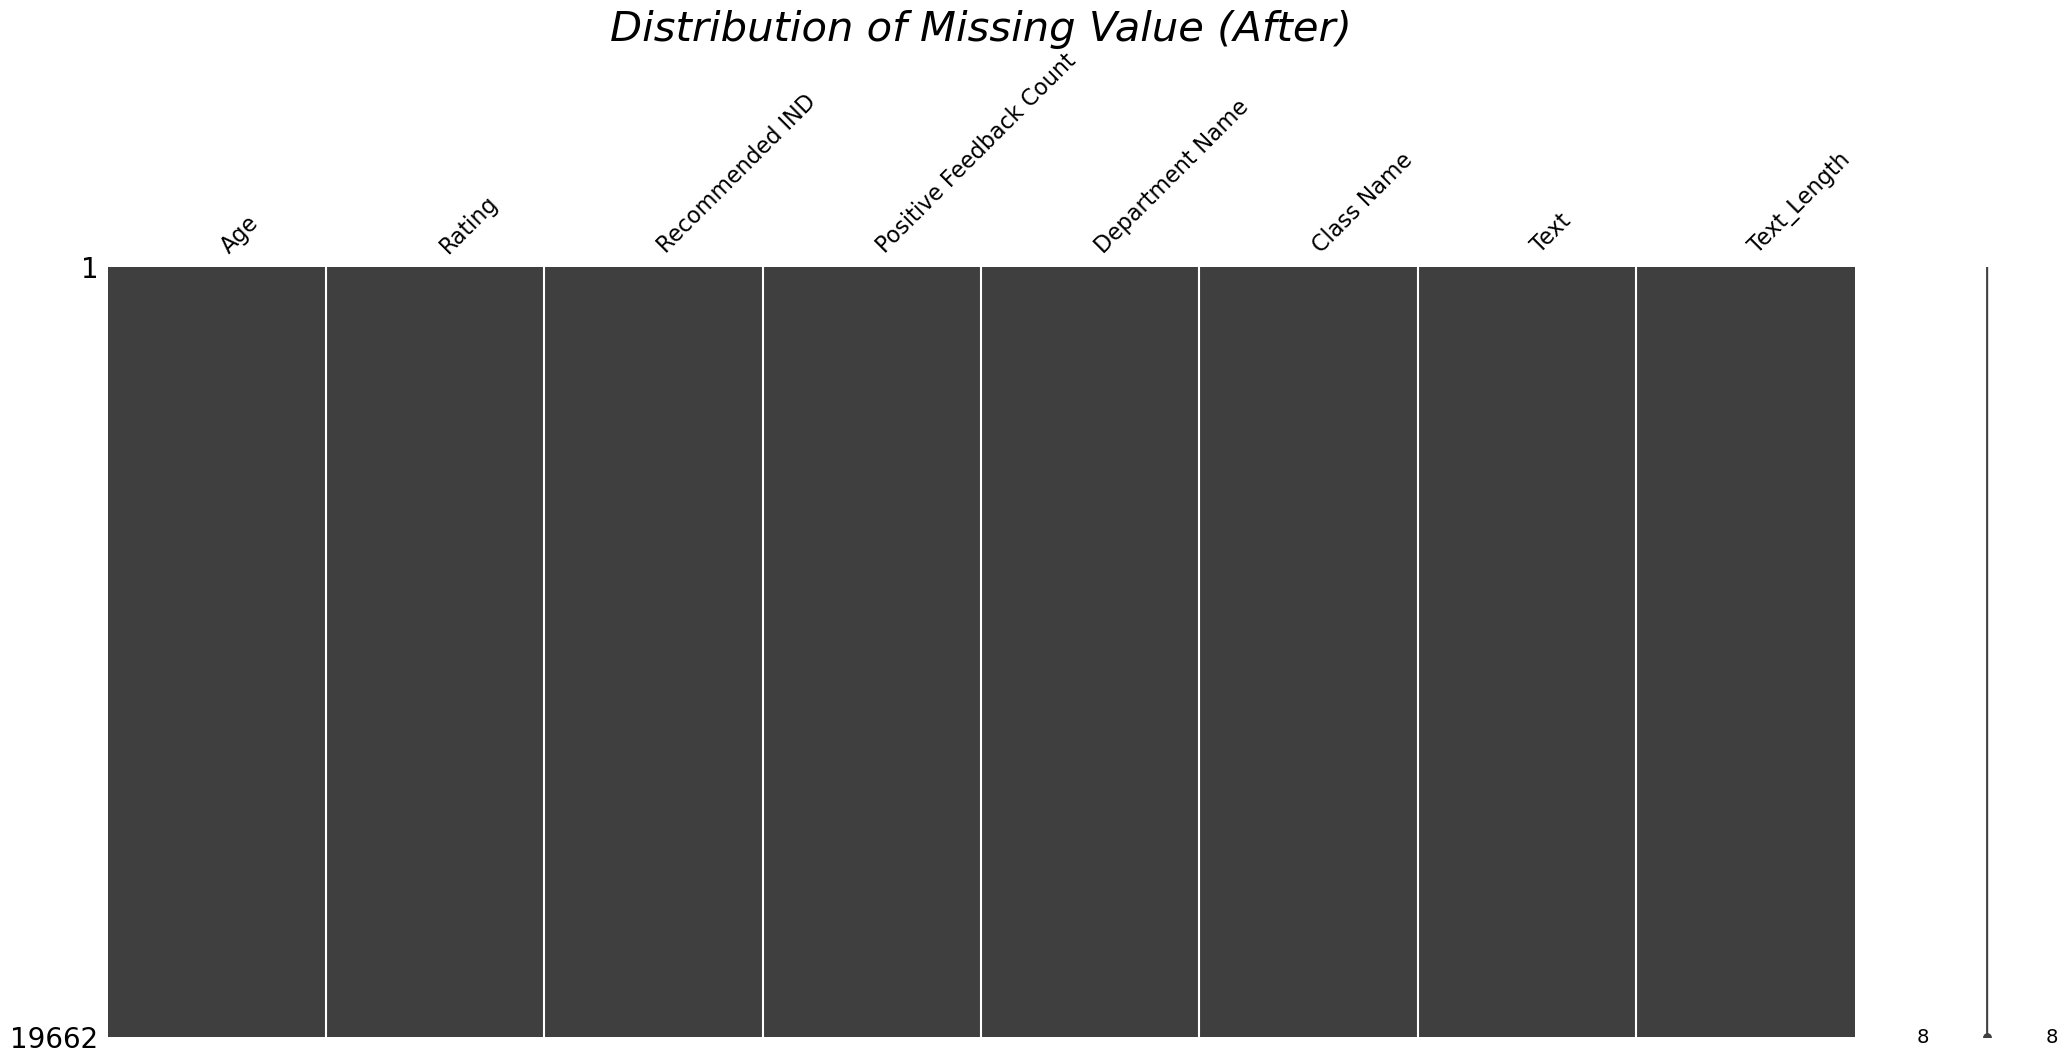

In [141]:
df.drop(['Unnamed: 0','Clothing ID'],axis=1,inplace=True)
df.dropna(subset=['Review Text','Division Name','Title'],inplace=True)
df['Text'] = df['Title'] + ' ' + df['Review Text']
df.drop(['Title','Review Text','Division Name'],axis=1,inplace=True)
df = df.reset_index().drop('index',axis=1)
df['Text_Length'] = df['Text'].apply(len)

print('Shape of DataFrame: ',df.shape)

msno.matrix(df).set_title('Distribution of Missing Value (After)',fontsize=30, fontstyle= 'oblique')

In [142]:
df.head()

Age  Rating  Recommended IND  Positive Feedback Count Department Name  \
0   60       3                0                        0         Dresses   
1   50       5                1                        0         Bottoms   
2   47       5                1                        6            Tops   
3   49       2                0                        4         Dresses   
4   39       5                1                        1            Tops   

  Class Name                                               Text  Text_Length  
0    Dresses  Some major design flaws I had such high hopes ...          524  
1      Pants  My favorite buy! I love, love, love this jumps...          141  
2    Blouses  Flattering shirt This shirt is very flattering...          209  
3    Dresses  Not for the very petite I love tracy reese dre...          512  
4      Knits  Cagrcoal shimmer fun I aded this in my basket ...          517

In [143]:
describe=df.describe(include =['float', 'int'])
describe.T.style.background_gradient(low=0.2,high=0.5,cmap = 'rocket_r')

In [144]:
age = df.Age.value_counts().sort_index()
age_range = [10*i for i in range(1,10)]
store = []
age_df = pd.DataFrame(columns=['count','age'])
age.index

Int64Index([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
            35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
            52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
            69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
            86, 87, 89, 90, 91, 92, 93, 94, 99],
           dtype='int64')

In [145]:
for idx,count in enumerate(age_range):
    for idx, num in enumerate(age):
        print(num,count)

4 10
28 10
91 10
75 10
106 10
210 10
201 10
276 10
369 10
300 10
358 10
446 10
342 10
477 10
511 10
606 10
669 10
728 10
664 10
626 10
658 10
1103 10
484 10
607 10
555 10
503 10
500 10
448 10
634 10
471 10
544 10
419 10
337 10
332 10
375 10
485 10
321 10
275 10
406 10
297 10
232 10
249 10
298 10
186 10
286 10
186 10
207 10
191 10
260 10
137 10
99 10
95 10
75 10
37 10
41 10
31 10
45 10
22 10
8 10
18 10
13 10
14 10
9 10
2 10
12 10
41 10
6 10
5 10
2 10
1 10
3 10
2 10
3 10
1 10
2 10
1 10
1 10
4 20
28 20
91 20
75 20
106 20
210 20
201 20
276 20
369 20
300 20
358 20
446 20
342 20
477 20
511 20
606 20
669 20
728 20
664 20
626 20
658 20
1103 20
484 20
607 20
555 20
503 20
500 20
448 20
634 20
471 20
544 20
419 20
337 20
332 20
375 20
485 20
321 20
275 20
406 20
297 20
232 20
249 20
298 20
186 20
286 20
186 20
207 20
191 20
260 20
137 20
99 20
95 20
75 20
37 20
41 20
31 20
45 20
22 20
8 20
18 20
13 20
14 20
9 20
2 20
12 20
41 20
6 20
5 20
2 20
1 20
3 20
2 20
3 20
1 20
2 20
1 20
1 20
4 30
28 30
9

In [146]:
age = df.Age.value_counts().sort_index()
age_range = [10*i for i in range(1,10)]
store = []
age_df = pd.DataFrame(columns=['count','age'])
for idx,count in enumerate(age_range):
    store.append([age[num] for idx, num in enumerate(age.index) if num >=count and num<=count+9])
age = [str(num)+'to'+str(num+9) for num in age_range]
age_df['count'] = [sum(num) for num in store]
age_df['age'] = age

In [147]:
hist_data = [df['Age']]
group_labels = ['Age Distribution']

# 1. distribution plot
fig1 = ff.create_distplot(hist_data, group_labels, show_hist = False, colors=['#b2182b'])
fig1.update_layout(title = 'Age Distribution',template = "simple_white") 

# 2. bar plot
fig2 = px.bar(x = age_df['age'], 
              y = age_df['count'], 
              text = age_df['count'], color = age_df['age'],
              color_discrete_sequence = px.colors.sequential.RdBu,
              template = "simple_white",
              title = 'Age Bar Plot')

fig2.update_traces(width=0.7)

# marker line
idx = [num for num in range(2,5)]
for index in idx:
    fig2.data[index].marker.line.width = 2
    fig2.data[index].marker.line.color = "black"

fig1.update_layout(
    font=dict(size=17,family="Franklin Gothic"))
fig2.update_layout(
    xaxis_title="Age Range",
    yaxis_title="count",
    font=dict(size=17,family="Franklin Gothic"))

fig1.show()
fig2.show()

In [148]:
rating = df['Rating'].value_counts()
# 2 subplots
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])

recommended = df['Recommended IND'].value_counts()
recommended = df['Recommended IND'].value_counts().sort_values(ascending=False)

# 1. Rating
fig.add_trace(go.Pie(values=rating.values,
             labels=rating.index, 
             marker=dict(colors=['#fddbc7','#f4a582','#d6604d','#b2182b','#67001f']),
             title= 'Rating',titlefont=dict(size=17)),row=1,col=1)

# 2. Recommended IND
fig.add_trace(go.Pie(values=recommended.values, 
             labels=recommended.index, 
             marker=dict(colors=['#fddbc7','#b2182b']),
             title= 'Recommended IND',titlefont=dict(size=17)),row=1,col=2)

fig.update_traces(textinfo='label+percent+value', textfont_size=14,
                  marker=dict(line=dict(color='black', width=0.2)))
fig.update_layout(
    font=dict(size=17,family="Franklin Gothic"))

In [149]:
hist_data = [df['Positive Feedback Count']]
group_labels = ['Positive Feedback Count']

# 1. distribution plot
fig1 = ff.create_distplot(hist_data, group_labels,show_hist = False, colors = ['#b2182b'])
# 2. box plot
fig2 = px.box(df['Positive Feedback Count'],color_discrete_sequence=px.colors.sequential.RdBu,
              orientation='h')

fig1.update_layout(title = 'Positive Feedback Count Distribution',
                   font = dict(size=17, family = 'Franklin Gothic'),template = "simple_white") 
fig2.update_layout(title = 'Positive Feedback Count (Box Plot)',
                   font = dict(size=17, family = 'Franklin Gothic'),template = "simple_white")

fig1.show()
fig2.show()

In [150]:
recommended = df[df['Recommended IND'] == 1]
recommended_n = df[df['Recommended IND']==0]

In [151]:
recommended.columns

Index(['Age', 'Rating', 'Recommended IND', 'Positive Feedback Count',
       'Department Name', 'Class Name', 'Text', 'Text_Length'],
      dtype='object')

In [152]:
# treemap
'''fig = px.treemap(df, path=[px.Constant("Division Name"), 'Class Name'], values='Positive Feedback Count',
                  color_continuous_scale='RdBu',
                  color_continuous_midpoint=np.average(df['Age'], weights=df['Positive Feedback Count']))
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()
'''

'fig = px.treemap(df, path=[px.Constant("Division Name"), \'Class Name\'], values=\'Positive Feedback Count\',\n                  color_continuous_scale=\'RdBu\',\n                  color_continuous_midpoint=np.average(df[\'Age\'], weights=df[\'Positive Feedback Count\']))\nfig.update_layout(margin = dict(t=50, l=25, r=25, b=25))\nfig.show()\n'

In [153]:
# get all of strings from sentences
def get_all_str(sentences):
    sentence = ''
    for words in sentences:
        sentence += words
    sentence = sentence.lower()
    return sentence

# get string from list
def get_str(lst):
    sentence = ''
    for char in lst:
        sentence += char+' '
    sentence = sentence.lower()
    return sentence

# get word from text
def get_word(text): 
    result = nltk.RegexpTokenizer(r'\w+').tokenize(text.lower())
    return result

# remove stopwords from list
def remove_stopword(lst):    
    stoplist = stopwords.words('english')
    txt = ''
    for idx in range(len(lst)):
        txt += lst[idx]
        txt += '\n'
    cleanwordlist = [word for word in txt.split() if word not in stoplist] 
#     print(stoplist)
    return cleanwordlist

# lemmatize
def lemmatization(words):
    lemm = WordNetLemmatizer()
    tokens = [lemm.lemmatize(word) for word in words]
    return tokens

# get frequency dataframe which consists of frequency and term
def Freq_df(cleanwordlist):
    Freq_dist_nltk = nltk.FreqDist(cleanwordlist)
    df_freq = pd.DataFrame.from_dict(Freq_dist_nltk, orient='index')
    df_freq.columns = ['Frequency']
    df_freq.index.name = 'Term'
    df_freq = df_freq.sort_values(by=['Frequency'],ascending=False)
    df_freq = df_freq.reset_index()
    return df_freq

# function to plot word cloud of words
def Word_Cloud(data, color_background, colormap, mask):
    plt.figure(figsize = (20,15))
    wc = WordCloud(width=800, 
               height=400, 
               max_words=340,
               mask = mask,
               colormap= colormap,
               max_font_size=200,
               min_font_size = 1 ,
               random_state=8888, 
               background_color=color_background).generate_from_frequencies(data)
    
    plt.imshow(wc, interpolation='bilinear')
    #plt.title(str(title), fontsize=20)
    plt.axis('off')
    plt.show()

#   function to preprocess
def preprocess(column):
    all_str = get_all_str(column)
    words = get_word(all_str)
    after_removing = remove_stopword(words)
    lemmatize = lemmatization(after_removing)
    frequency_df = Freq_df(lemmatize)
    return frequency_df

# preprocess -> get frequency dataframe -> plot Word Cloud
def create_wordcloud(column,color,mask):
    frequency_df = preprocess(column)
    data = frequency_df.set_index('Term').to_dict()['Frequency']
    title = 'Word Cloud'
    #color = 'Rocket'
    Word_Cloud(data,'white','rocket', mask)

In [154]:
# get picture
url = 'https://media.istockphoto.com/photos/woman-purple-dress-fashion-model-in-long-fluttering-gown-back-rear-picture-id1090972948?k=20&m=1090972948&s=612x612&w=0&h=56SBD2hFG03zOvfRaNOI_jLpsLuXQXjRmL7LOOo38Sw='
mask = np.array(Image.open(requests.get(url, stream=True).raw))

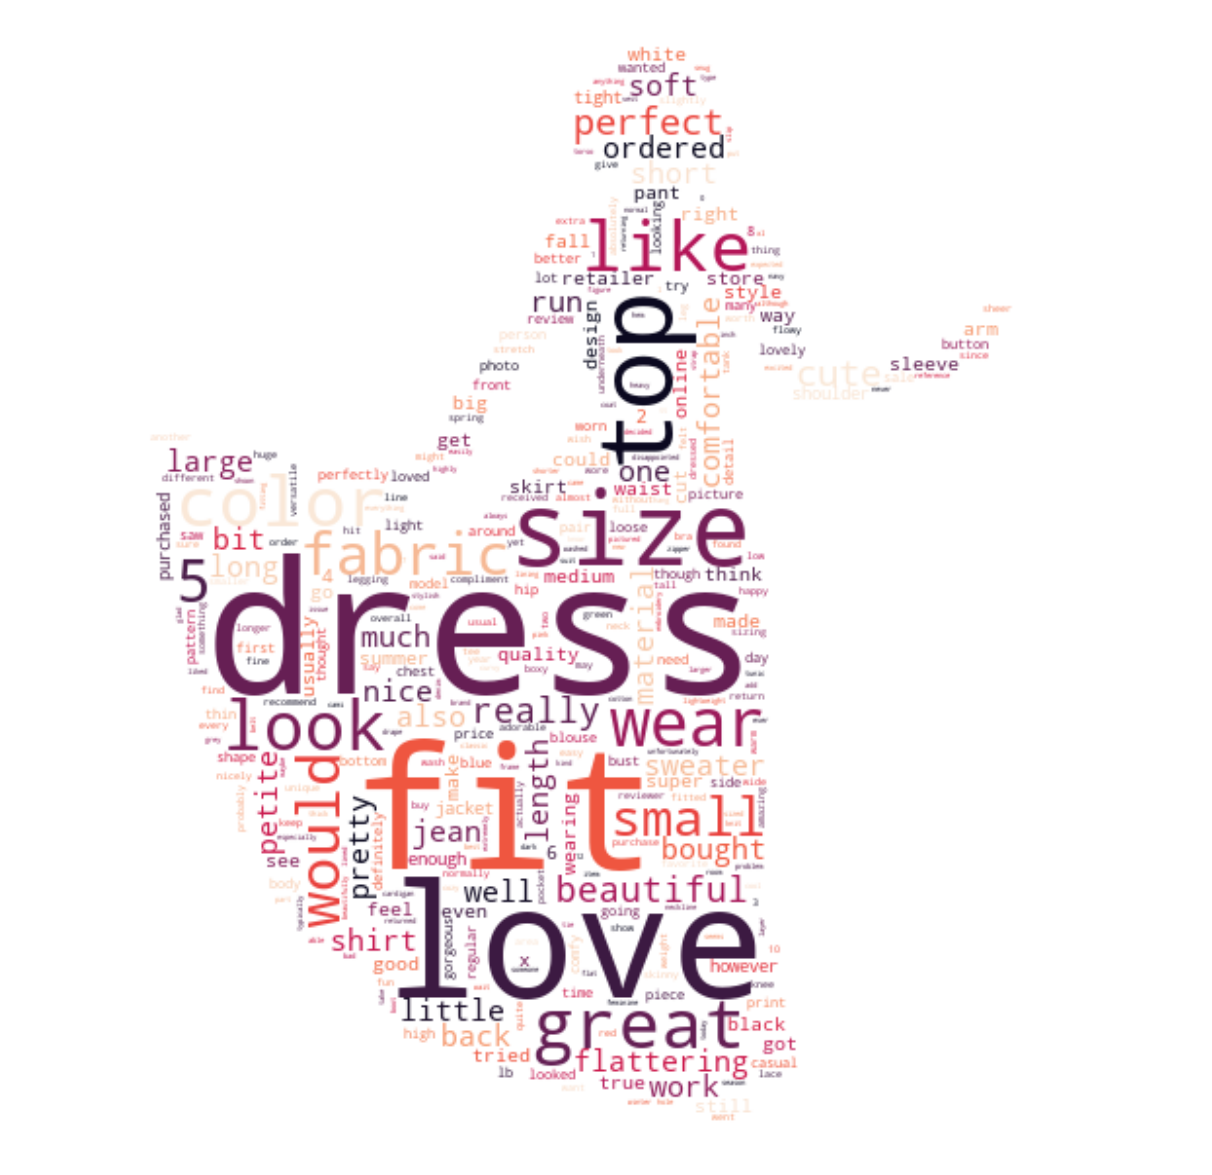

In [155]:
top10_frequent = preprocess(df['Text'])[:10]

# 1. bar plot
fig = px.bar(top10_frequent, 
             x = 'Term', y = 'Frequency',
             text = 'Frequency',
             color_discrete_sequence = px.colors.sequential.RdBu, 
             title = '1. Top 10 frequent terms (bar plot)', 
             color='Term',template = "simple_white")
fig.update_layout(font = dict(size=17, family = 'Franklin Gothic'))
fig.show()


ttle = 'Text of Comments (Word Cloud)'
create_wordcloud(df['Text'],'rocket', mask)

In [156]:
for idx in range(len(age_range)):
    df.loc[np.logical_and(df['Age']>=age_range[idx],df['Age']<=age_range[idx]+9), 'AgeGroup'] = age[idx]
df['Age'] = df['AgeGroup']
df.drop('AgeGroup',axis=1,inplace=True)

ten = df.groupby(['Age','Department Name']).size()['10to19']
twe = df.groupby(['Age','Department Name']).size()['20to29']
thi = df.groupby(['Age','Department Name']).size()['30to39']
fou = df.groupby(['Age','Department Name']).size()['40to49']
fif = df.groupby(['Age','Department Name']).size()['50to59']
six = df.groupby(['Age','Department Name']).size()['60to69']
sev = df.groupby(['Age','Department Name']).size()['70to79']
eig = df.groupby(['Age','Department Name']).size()['80to89']
nin = df.groupby(['Age','Department Name']).size()['90to99']
marker_color = ['#67001f','#b2182b','#d6604d','#f4a582','#fddbc7','#d1e5f0','#92c5de','#4393c3','#2166ac']

In [157]:
# bar plot: Department by Age
fig = go.Figure(data=[
    go.Bar(name='10to19', 
           x=ten.index, y=ten.values/sum(ten),
           text=np.round(ten.values/sum(ten),2), 
           marker_color=marker_color[0]),
    
    go.Bar(name='20to29', x=twe.index, y=twe.values/sum(twe),
           text=np.round(twe.values/sum(twe),2), 
           marker_color=marker_color[1]),
    
    go.Bar(name='30to39', x=thi.index, y=thi.values/sum(thi),
           text=np.round(thi.values/sum(thi),2), 
           marker_color=marker_color[2]),
    
    go.Bar(name='40to49', x=fou.index, y=fou.values/sum(fou),
           text=np.round(fou.values/sum(fou),2), 
           marker_color=marker_color[3]),
    
        go.Bar(name='50to59', x=fif.index, y=fif.values/sum(fif),
           text=np.round(fif.values/sum(fif),2), 
               marker_color=marker_color[4]),
    
    go.Bar(name='60to69', x=six.index, y=six.values/sum(six),
           text=np.round(twe.values/sum(six),2), 
           marker_color=marker_color[5]),
    
    go.Bar(name='70to79', x=sev.index, y=sev.values/sum(sev),
           text=np.round(thi.values/sum(sev),2),
           marker_color=marker_color[6]),
    
    go.Bar(name='80to89', x=eig.index, y=eig.values/sum(eig),
           text=np.round(fou.values/sum(eig),2), 
           marker_color=marker_color[7]),
    
    go.Bar(name='90to99', x=nin.index, y=nin.values/sum(nin),
           text=np.round(nin.values/sum(nin),2), 
           marker_color=marker_color[8]),
])

fig.update_layout(xaxis_tickangle=-45, title='Department Name by Age',
                  font = dict(size=17, family = 'Franklin Gothic'), template = "simple_white")
fig.show()

In [158]:
depart_rate = df.groupby(['Department Name','Rating']).size()
Bottoms = np.round(depart_rate['Bottoms'].values/depart_rate['Bottoms'].values.sum(),2)
Dresses = np.round(depart_rate['Dresses'].values/depart_rate['Dresses'].values.sum(),2)
Intimate = np.round(depart_rate['Intimate'].values/depart_rate['Intimate'].values.sum(),2)
Jackets = np.round(depart_rate['Jackets'].values/depart_rate['Jackets'].values.sum(),2)
Tops = np.round(depart_rate['Tops'].values/depart_rate['Tops'].values.sum(),2)
Trend = np.round(depart_rate['Trend'].values/depart_rate['Trend'].values.sum(),2)

In [159]:
fig = go.Figure()
categories = ['Rating: 1', 'Rating: 2', 'Rating: 3', 'Rating: 4', 'Rating: 5']
colors = ['#b2182b', '#d6604d', '#fddbc7', '#d1e5f0', '#4393c3']

# radar plot (just plot Jacket & Trend)

# fig.add_trace(go.Scatterpolar(
#              r = Bottoms, 
#              theta = categories,
#              fill = 'toself',
#              name = 'Bottoms',
#              ))
# fig.add_trace(go.Scatterpolar(
#              r = Dresses, 
#              theta = categories,
#              fill = 'toself',
#              name = 'Dresses',
#              ))
# fig.add_trace(go.Scatterpolar(
#              r = Intimate, 
#              theta = categories,
#              fill = 'toself',
#              name = 'Intimate',
#              ))

fig.add_trace(go.Scatterpolar(
             r = Jackets, 
             theta = categories,
             fill = 'toself',
             name = 'Jackets',
             ))

# fig.add_trace(go.Scatterpolar(
#              r = Tops, 
#              theta = categories,
#              fill = 'toself',
#              name = 'Tops',
#              ))

fig.add_trace(go.Scatterpolar(
             r = Trend, 
             theta = categories,
             fill = 'toself',
             name = 'Trend',
             ))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      range=[0, 0.7]
    )),
  showlegend=True,
  title = '1. Department by Rating (Radar Plot)',
  font = dict(size=17, family = 'Franklin Gothic')
)
Department_name = df.groupby('Department Name').size()
Rating_5 = (df.groupby(['Rating','Department Name']).size()[5] / Department_name).sort_values(ascending=False)
Rating_4 = (df.groupby(['Rating','Department Name']).size()[4] / Department_name).sort_values(ascending=False)
Rating_3 = (df.groupby(['Rating','Department Name']).size()[3] / Department_name).sort_values(ascending=False)
Rating_2 = (df.groupby(['Rating','Department Name']).size()[2] / Department_name).sort_values(ascending=False)
Rating_1 = (df.groupby(['Rating','Department Name']).size()[1] / Department_name).sort_values(ascending=False)

# bar plot
fig2 = go.Figure(data=[
    go.Bar(name='Rating: 5', x=Rating_5.index, y=Rating_5.values,
           text=np.round(Rating_5.values,2), marker_color=colors[0]),
    go.Bar(name='Rating: 4', x=Rating_4.index, y=Rating_4.values,
           text=np.round(Rating_4.values,2), marker_color=colors[1]),
    go.Bar(name='Rating: 3', x=Rating_3.index, y=Rating_3.values,
           text=np.round(Rating_3.values,2), marker_color=colors[2]),
    go.Bar(name='Rating: 2', x=Rating_2.index, y=Rating_2.values,
           text=np.round(Rating_2.values,2), marker_color=colors[3]),
    go.Bar(name='Rating: 1', x=Rating_1.index, y=Rating_1.values,
           text=np.round(Rating_1.values,2), marker_color=colors[4]),
])

fig2.update_layout(xaxis_tickangle=-45, template = "simple_white", 
                   font = dict(size=17, family = 'Franklin Gothic'), title = '2. Depart by Rating (bar plot)')
fig.layout.template = 'none'
fig.show()
fig2.show()

In [160]:
def pos_adjective(tagged):
    only_adjective = [word for word,pos in tagged if pos in ['JJ','JJR','JJS'
                                                          ]]
    stopwords = ['top']
    txt = ''
    for i in range(len(only_adjective)):
        txt += only_adjective[i]
        txt += '\n'
    cleanwordlist = [word for word in txt.split() if word not in stopwords] 
    return cleanwordlist

def preprocess_adj(column):
    all_str = get_all_str(column)
    words = get_word(all_str)
    after_removing = remove_stopword(words)
    lemmatize = lemmatization(after_removing)
    tagged = nltk.pos_tag(lemmatize)
    postag = pos_adjective(tagged)
    frequency_df = Freq_df(postag)
    return frequency_df

def create_adj_wordcloud(column, color,mask):
    frequency_df = preprocess_adj(column)
    data = frequency_df.set_index('Term').to_dict()['Frequency']
    Word_Cloud(data, 'white',color,mask)

In [161]:
recommended_n = df[df['Recommended IND']==0]
recommended = df[df['Recommended IND']==1]



In [162]:
# get url
url = 'https://media.istockphoto.com/vectors/bright-red-christmas-sweater-in-cartoon-style-a-jumper-with-a-picture-vector-id1358084007?b=1&k=20&m=1358084007&s=612x612&w=0&h=_H0o30gk0zKrqMFdiuAFel1A-_kj87kUUBlPyIaNjHA='
mask = np.array(Image.open(requests.get(url, stream=True).raw))

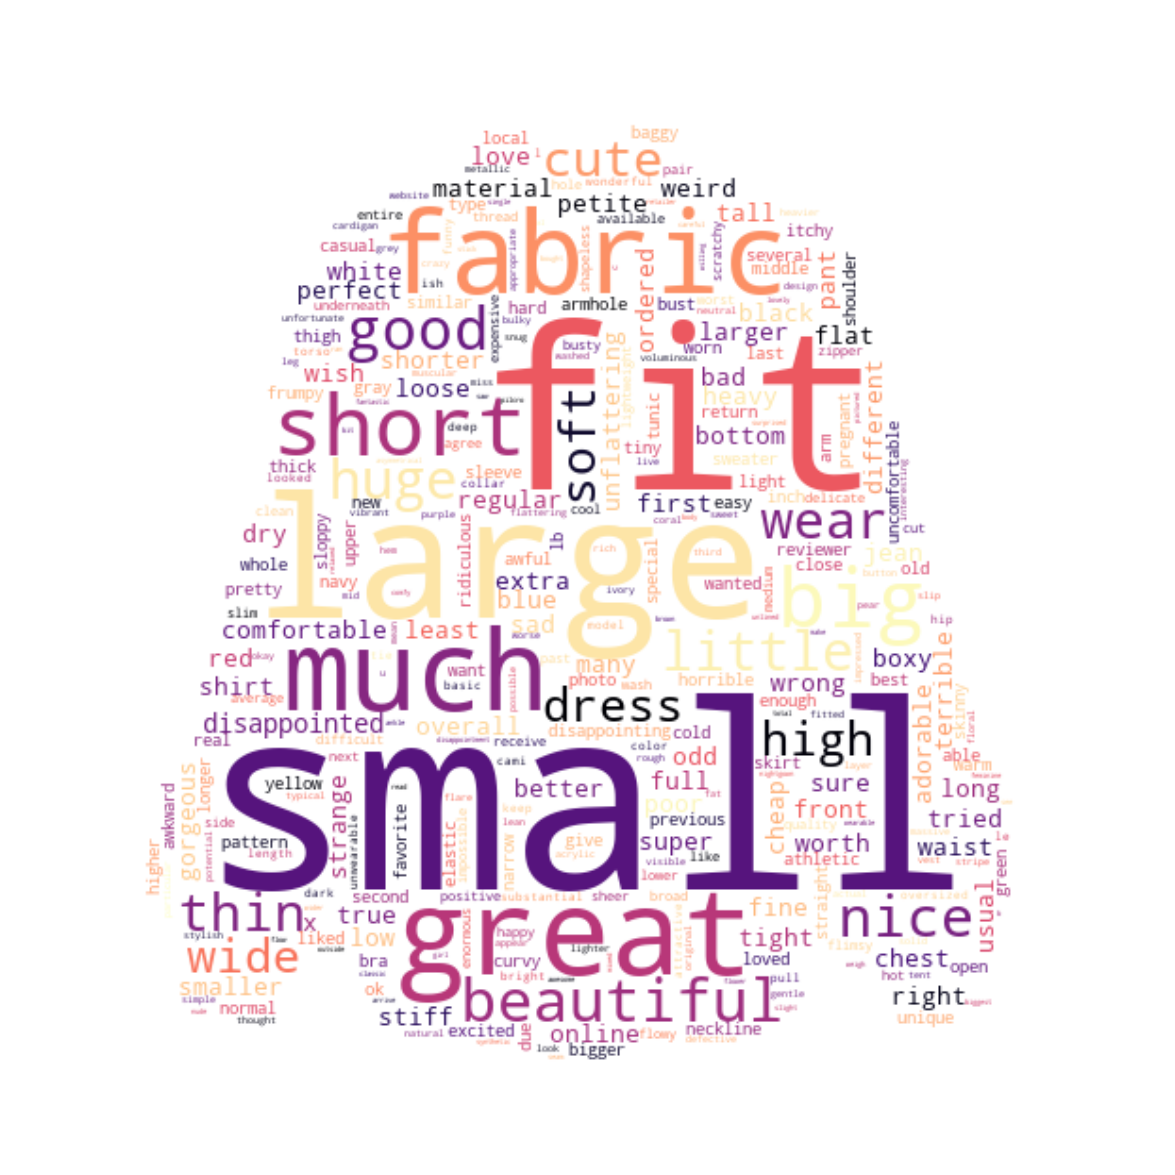

In [163]:
n_df = preprocess_adj(recommended_n['Text'])

# 1. bar plot: Top 20 to 29 frequent terms from comments of unrecommended products
fig = px.bar(x = n_df[20:29].Term, y = n_df[20:29].Frequency,
            color = n_df[20:29].Term,
            text = n_df[20:29].Frequency,
            color_discrete_sequence=px.colors.sequential.RdBu,
            title = 'Top 20~29 Comments of Unrecommended Products (Bar Plot)',
            template = 'simple_white')

idx = [0,1,8]

for index in idx:
    fig.data[index].marker.line.width = 4
    fig.data[index].marker.line.color = "black"
    
fig.update_layout(
    xaxis_title="Top 20~29 Unrecommended Comments",
    yaxis_title="count",
    font = dict(size=17, family = 'Franklin Gothic'))

fig.show()

# 2. create Word Cloud
create_adj_wordcloud(recommended_n['Text'],'magma',mask)

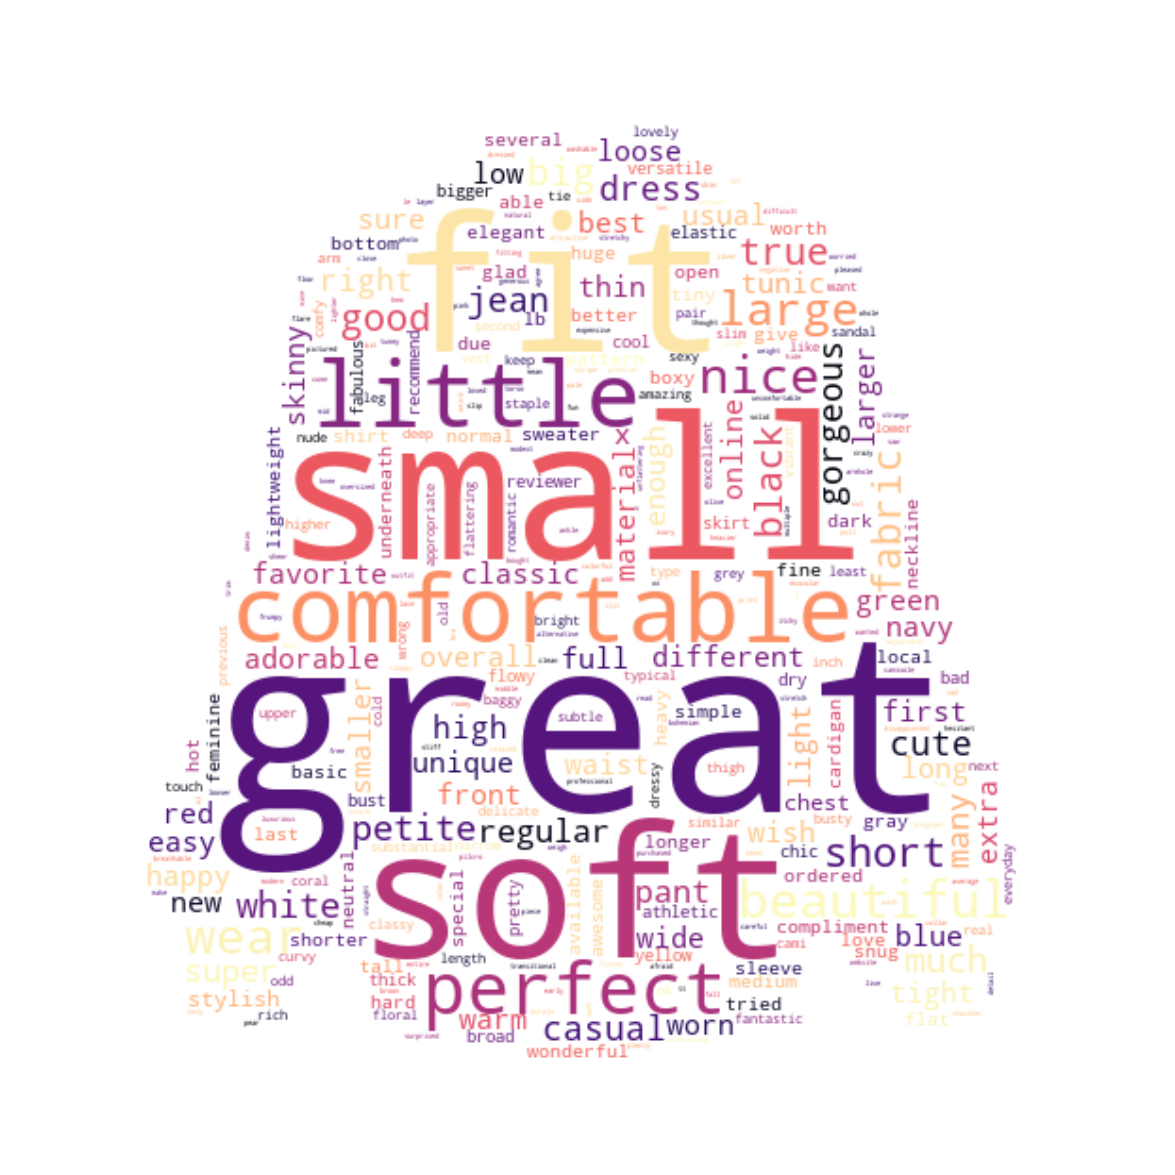

In [164]:
y_df = preprocess_adj(recommended['Text'])

# 1. bar plot: Top 1 to 10 frequent terms from comments of recommended products
fig = px.bar(x = y_df[:10].Term, y = y_df[:10].Frequency,
            color = y_df[:10].Term,
            text = y_df[:10].Frequency,
            color_discrete_sequence=px.colors.sequential.RdBu_r,
            title = '1. Top 10 Comments of Recommended Products (Bar Plot)',
            template = 'simple_white')

idx = [0,4,6,7,8]
for index in idx:
    fig.data[index].marker.line.width = 4
    fig.data[index].marker.line.color = 'black'


fig.update_layout(
    xaxis_title="Top 10 Recommended Comments",
    yaxis_title="count",
    font = dict(size=17, family = 'Franklin Gothic'))

fig.show()

# 2. Word Cloud
create_adj_wordcloud(recommended['Text'],'magma',mask)

In [165]:
def preprocess(column):
    all_str = get_all_str(column)
    words = get_word(all_str)
    after_removing = remove_stopword(words)
    lemmatize = lemmatization(after_removing)
    return lemmatize

df['Text'] = df['Text'].apply(preprocess)

In [166]:
y= df['Recommended IND']
X = df.drop('Recommended IND',axis=1)

# split by ratio of 0.3
train_X, test_X, train_y, test_y = train_test_split(X['Text'], y, test_size=0.3, random_state = 8888)    


In [167]:
len(train_X)

13763

In [168]:
max_len = max(max(train_X.apply(len).values),max(test_X.apply(len).values))

In [169]:
def fit_tokenizer(text, oov_token):
    tokenizer = Tokenizer(oov_token = oov_token)
    tokenizer.fit_on_texts(text)
    return tokenizer

# for sequence, padding
def seq_padding(sentences, tokenizer, padding, truncating, maxlen):
    sequences = tokenizer.texts_to_sequences(sentences)    
    pad_trunc_sequences = pad_sequences(sequences, padding = padding, maxlen = maxlen, truncating=padding)
    return pad_trunc_sequences

In [170]:
tokenizer = fit_tokenizer(train_X, "<OOV>")

word_index = tokenizer.word_index
VOCAB_SIZE = len(word_index)

train_X = seq_padding(train_X,tokenizer, 'post', 'post',max_len)
test_X = seq_padding(test_X,tokenizer, 'post', 'post', max_len)

In [171]:
GLOVE_FILE = '/Users/anitateladevalapalli/Documents/NN/glove.6B.100d.txt'
GLOVE_EMBEDDINGS = {}

with open(GLOVE_FILE) as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        GLOVE_EMBEDDINGS[word] = coefs

FileNotFoundError: [Errno 2] No such file or directory: '/Users/anitateladevalapalli/Documents/NN/glove.6B.100d.txt'

In [ ]:
EMBEDDINGS_MATRIX = np.zeros((VOCAB_SIZE+1, 100))

num = 0
missed_list = []

for word, i in word_index.items():
    embedding_vector = GLOVE_EMBEDDINGS.get(word)
    if embedding_vector is not None:
        EMBEDDINGS_MATRIX[i] = embedding_vector
    else:
        num += 1
        missed_list.append(word)

print('How many missed words? ',num)
print('As example: ',missed_list[:10])

In [ ]:
def LSTM_model(vocab_size, embedding_dim, maxlen, embeddings_matrix):
    
    model = Sequential()
    
    model.add(Embedding(vocab_size+1,embedding_dim,input_length = maxlen, weights = [embeddings_matrix],trainable=False))
    model.add(Bidirectional(LSTM(64,kernel_regularizer=keras.regularizers.l2(0.001))))
    model.add(Dropout(0.3))
    
    tf.keras.layers.GlobalAveragePooling1D()

    model.add(Dense(6, activation = 'relu',kernel_regularizer=keras.regularizers.l2(0.001)))
    model.add(Dropout(0.3))
    model.add(Dense(1, activation = 'sigmoid'))
    
    model.compile(loss = 'binary_crossentropy',
                  optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
                  metrics = ['AUC']) 
    model.summary()
    return model

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor="val_loss", mode="auto", 
                           verbose=1, patience = 10, restore_best_weights=True)

In [ ]:
model = LSTM_model(VOCAB_SIZE, 100, max_len, EMBEDDINGS_MATRIX)

history = model.fit(train_X, train_y, epochs = 60, batch_size = 252, validation_data=(test_X, test_y))

In [ ]:
epoch = [x for x in range(1,61)]

color = ['#67001f','#b2182b','#4393c3','#2166ac']

fig1 = go.Figure(data = [
    go.Line(x = epoch, y = history.history['auc'],line_color=color[0],name='1.auc score'),
    
    go.Line(x = epoch, y = history.history['val_auc'],line_color=color[3],name='2.val_auc score')
])

fig2 = go.Figure(data = [
    go.Line(x = epoch, y = history.history['loss'],line_color = color[1],name='3.loss'),
    
    go.Line(x = epoch, y = history.history['val_loss'], line_color = color[2],name='4.val_loss')
])

figures = [fig1,fig2]
title = ['AUC & val_AUC Score','Loss & Val_Loss Score']
fig = make_subplots(cols=len(figures),
                   subplot_titles=(title[0], title[1])) 

for i, figure in enumerate(figures):
    for trace in range(len(figure["data"])):
        fig.append_trace(figure["data"][trace], row=1, col=i+1)
        
fig.update_xaxes(title_text="epochs", row=1, col=1)
fig.update_xaxes(title_text="epochs", row=1, col=2)

fig.update_yaxes(title_text="AUC", row=1, col=1)
fig.update_yaxes(title_text="Loss", row=1, col=2)

fig.update_layout(template = "simple_white", title = 'AUC & LOSS',
                 font = dict(size=17, family = 'Franklin Gothic'))

In [ ]:
# test probability
test_predict_proba = model.predict(test_X, verbose=0)
# test predicted label
test_prediction_label = (model.predict(test_X) >= 0.5).astype("int32")  

accuracy = accuracy_score(test_y, test_prediction_label)
precision = precision_score(test_y, test_prediction_label)
recall = recall_score(test_y, test_prediction_label)
f1 = f1_score(test_y, test_prediction_label)
AUC = roc_auc_score(test_y, test_predict_proba)

# get list of test scores
test_score_list = [accuracy, precision, recall, f1, AUC]
print(test_score_list)

In [ ]:
 # test probability
train_predict_proba = model.predict(train_X, verbose=0)
# test predicted label
train_prediction_label = (model.predict(train_X) >= 0.5).astype("int32")  

accuracy = accuracy_score(train_y, train_prediction_label)
precision = precision_score(train_y, train_prediction_label)
recall = recall_score(train_y, train_prediction_label)
f1 = f1_score(train_y, train_prediction_label)
AUC = roc_auc_score(train_y, train_predict_proba)

# get list of train scores
train_score_list = [accuracy, precision, recall, f1, AUC]
print(train_score_list)

In [ ]:
score_name = ['Accuracy', 'Precision', 'Recall', 'F1', 'AUC']
fig = go.Figure(data=[
    go.Bar(name='Train Scores', 
           x=score_name, y=train_score_list,
           text=np.round(train_score_list,3),marker_color='#67001f'),
    go.Bar(name='Test Scores', 
           x=score_name, y=test_score_list,
           text=np.round(test_score_list,3),marker_color='#fddbc7')
])
fig.update_layout(template = 'simple_white', title = 'Comparison of Train Scores & Test Scores')

fig.update_layout(
    xaxis_title="scoring metrix",
    yaxis_title="score",
    font = dict(size=17, family = 'Franklin Gothic'))

fig.show()

In [ ]:
model.evaluate(train_X, train_y)

In [ ]:
model.evaluate(test_X, test_y)

In [ ]:
review1 = "Love this dress"
review2 = "Absolutely wonderful. silky and sexy and comfortable"
review3 = "i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up!"
review4 = "I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!"
review5 = 'This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!'
review6 = 'I love tracy reese dresses, but this one is not for the very petite. i am just under 5 feet tall and usually wear a 0p in this brand. this dress was very pretty out of the package but its a lot of dress.'
review7 = 'I love this dress. i usually get an xs but it runs a little snug in bust so i ordered up a size. very flattering and feminine with the usual retailer flair for style.'
review8 = 'Dress runs small esp where the zipper area runs. i ordered the sp which typically fits me and it was very tight! the material on the top looks and feels very cheap that even just pulling on it will cause it to rip the fabric. pretty disappointed as it was going to be my christmas dress this year! needless to say it will be going back.'
review9 =  "if you are at least average height or taller, this may look good on you."
review10 = "sadly will be returning, but i'm sure i will find something to exchange it for!"
review11 = "Cute little dress fits tts. it is a little high waisted. good length for my 5'9 height. i like the dress, i'm just not in love with it. i dont think it looks or feels cheap. it appears just as pictured."
review12 = 'Loved the material, but i didnt really look at how long the dress was before i purchased both a large and a medium. im 5\'5" and there was atleast 5" of material at my feet. the gaps in the front are much wider than they look. felt like the dress just fell flat. both were returned. im usually a large and the med fit better. 36d 30 in jeans'
review13 = "I have been waiting for this sweater coat to ship for weeks and i was so excited for it to arrive. this coat is not true to size and made me look short and squat."
review14 = 'not bad '
reviews = [review1, review2, review3, review4, review5, review6, review7, review8, review9, review10, review11, review12, review13, review14]

In [ ]:
tokens = tokenizer.texts_to_sequences(reviews) 

In [ ]:
maxlen1= 71
tokens_pad = pad_sequences(tokens, maxlen=maxlen1)
tokens_pad.shape

In [ ]:
mod_pred = model.predict(tokens_pad)
mod_pred

In [ ]:
df_pred = pd.DataFrame(mod_pred, index=reviews)
df_pred.rename(columns={0: 'Pred_Proba'}, inplace=True)

In [ ]:
df_pred["Predicted_Feedbaack"] = df_pred["Pred_Proba"].apply(lambda x: 1 if x>=0.5 else 0)

In [ ]:
df_pred

In [ ]:
from keras.layers import GRU,Bidirectional
from keras.initializers import Constant
model2 = Sequential()
from tensorflow.keras.optimizers import Adam
from keras.regularizers import l2


In [ ]:
def GRU_model(vocab_size, embedding_dim, maxlen, embeddings_matrix):
    
    model2 = Sequential()
    
    model2.add(Embedding(vocab_size+1,embedding_dim,input_length = maxlen, weights = [embeddings_matrix],trainable=False))
    model2.add(GRU(48,return_sequences=True))
    model2.add(GRU(24,return_sequences=True))
    Dense(16, activation='relu')
    
    model2.add(GRU(units=12)) 
    model2.add(Dropout(0.4))
    
    tf.keras.layers.GlobalAveragePooling1D()

    
    model2.add(Dense(1, activation = 'sigmoid'))
    
    optimizer = Adam(learning_rate=0.006)
 
    model2.compile(loss="binary_crossentropy", optimizer='Adam', metrics=["AUC"])
    return model2




In [ ]:
model2 = GRU_model(VOCAB_SIZE, 100, max_len, EMBEDDINGS_MATRIX)


In [ ]:
model2.summary() 

In [ ]:
model = GRU_model(VOCAB_SIZE, 100, max_len, EMBEDDINGS_MATRIX)
history2=model2.fit(train_X, train_y, epochs = 30, batch_size = 128, validation_data=(test_X, test_y))

In [ ]:
epoch = [x for x in range(1,61)]

color = ['#67001f','#b2182b','#4393c3','#2166ac']

fig1 = go.Figure(data = [
    go.Line(x = epoch, y = history2.history['auc'],line_color=color[0],name='1.auc score'),
    
    go.Line(x = epoch, y = history2.history['val_auc'],line_color=color[3],name='2.val_auc score')
])

fig2 = go.Figure(data = [
    go.Line(x = epoch, y = history2.history['loss'],line_color = color[1],name='3.loss'),
    
    go.Line(x = epoch, y = history2.history['val_loss'], line_color = color[2],name='4.val_loss')
])

figures = [fig1,fig2]
title = ['AUC & val_AUC Score','Loss & Val_Loss Score of GRU']
fig = make_subplots(cols=len(figures),
                   subplot_titles=(title[0], title[1])) 

for i, figure in enumerate(figures):
    for trace in range(len(figure["data"])):
        fig.append_trace(figure["data"][trace], row=1, col=i+1)
        
fig.update_xaxes(title_text="epochs", row=1, col=1)
fig.update_xaxes(title_text="epochs", row=1, col=2)

fig.update_yaxes(title_text="AUC", row=1, col=1)
fig.update_yaxes(title_text="Loss", row=1, col=2)

fig.update_layout(template = "simple_white", title = 'AUC & LOSS of GRU',
                 font = dict(size=17, family = 'Franklin Gothic'))

In [ ]:
model_loss = pd.DataFrame(model2.history.history)
model_loss.head()

In [ ]:
model_loss.plot()

In [ ]:
model2.evaluate(train_X, train_y)

In [ ]:
model2.evaluate(test_X,test_y)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, roc_auc_score

y_train_pred = (model2.predict(train_X) >= 0.5).astype("int32")  

print(confusion_matrix(train_y, y_train_pred))
print("-------------------------------------------------------")
print(classification_report(train_y, y_train_pred))

In [ ]:
y_pred = (model2.predict(test_X) >= 0.5).astype("int32")

print(confusion_matrix(test_y, y_pred))
print("-------------------------------------------------------")
print(classification_report(test_y, y_pred))

In [ ]:
review1 = "Love this dress"
review2 = "Absolutely wonderful. silky and sexy and comfortable"
review3 = "i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up!"
review4 = "I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!"
review5 = 'This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!'
review6 = 'I love tracy reese dresses, but this one is not for the very petite. i am just under 5 feet tall and usually wear a 0p in this brand. this dress was very pretty out of the package but its a lot of dress.'
review7 = 'I love this dress. i usually get an xs but it runs a little snug in bust so i ordered up a size. very flattering and feminine with the usual retailer flair for style.'
review8 = 'Dress runs small esp where the zipper area runs. i ordered the sp which typically fits me and it was very tight! the material on the top looks and feels very cheap that even just pulling on it will cause it to rip the fabric. pretty disappointed as it was going to be my christmas dress this year! needless to say it will be going back.'
review9 =  "if you are at least average height or taller, this may look good on you."
review10 = "sadly will be returning, but i'm sure i will find something to exchange it for!"
review11 = "Cute little dress fits tts. it is a little high waisted. good length for my 5'9 height. i like the dress, i'm just not in love with it. i dont think it looks or feels cheap. it appears just as pictured."
review12 = 'Loved the material, but i didnt really look at how long the dress was before i purchased both a large and a medium. im 5\'5" and there was atleast 5" of material at my feet. the gaps in the front are much wider than they look. felt like the dress just fell flat. both were returned. im usually a large and the med fit better. 36d 30 in jeans'
review13 = "I have been waiting for this sweater coat to ship for weeks and i was so excited for it to arrive. this coat is not true to size and made me look short and squat."
review14 = 'not bad '
reviews = [review1, review2, review3, review4, review5, review6, review7, review8, review9, review10, review11, review12, review13, review14]

In [ ]:
maxlen=50
tokens = tokenizer.texts_to_sequences(reviews) 
tokens_pad = pad_sequences(tokens, maxlen=maxlen)
tokens_pad.shape

In [ ]:
mod_pred = model2.predict(tokens_pad)
mod_pred

In [ ]:
df_pred = pd.DataFrame(mod_pred, index=reviews)
df_pred.rename(columns={0: 'Pred_Proba'}, inplace=True)

In [ ]:
df_pred["Predicted_Feedbaack"] = df_pred["Pred_Proba"].apply(lambda x: 1 if x>=0.5 else 0)

In [ ]:
df_pred